In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("../data/misgrosi_candidate.csv")
df_density = pd.read_excel('../../density.xlsx')

In [2]:
df.head()

,Name,Intro,Location,Role,Post Code,Stadt
0,Nani Moni,Einfach ein lässiges Grosi sy,4900 Langenthal,Tages-Grosi,4900.0,Langenthal
1,Jida,Betreue Kinder aus allen Kulturen,4051 Basel,Tages-Grosi,4051.0,Basel
2,Phoebe-Grosi,Bin da offen und neugierig,8105 Watt,Tages-Grosi,8105.0,Watt
3,Wunsch-Omi Elvira,"Jungebliebene, aktive mitten im Leben stehende...",9533 Kirchberg,Tages-Grosi,9533.0,Kirchberg
4,Grosi claudia,Bin aufgestellt und kinder lieb,3363 Oberön,Tages-Grosi,3363.0,Oberön


In [3]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df['Post Code'] = df.apply(post, axis=1)

In [4]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df['Stadt'] = df.apply(stadt, axis=1)

In [5]:
df.head()

,Name,Intro,Location,Role,Post Code,Stadt
0,Nani Moni,Einfach ein lässiges Grosi sy,4900 Langenthal,Tages-Grosi,4900,Langenthal
1,Jida,Betreue Kinder aus allen Kulturen,4051 Basel,Tages-Grosi,4051,Basel
2,Phoebe-Grosi,Bin da offen und neugierig,8105 Watt,Tages-Grosi,8105,Watt
3,Wunsch-Omi Elvira,"Jungebliebene, aktive mitten im Leben stehende...",9533 Kirchberg,Tages-Grosi,9533,Kirchberg
4,Grosi claudia,Bin aufgestellt und kinder lieb,3363 Oberön,Tages-Grosi,3363,Oberön


In [6]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,2540,1
1,3027,1
2,3052,1
3,3053,1
4,3063,1
...,...,...
79,78351,1
80,79639,1
81,79875,1
82,80992,1


In [7]:
# Merge grouped aby data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,City,Region,Population,Area,Density,gig_per,urban
0,2540,1,NaN,Canton of Solothurn,15696.0,26.00,603.692308,0.006371,urban
1,3027,1,NaN,Canton of Bern,11214.0,6.30,1780.000000,0.008917,urban center
2,3052,1,NaN,Canton of Bern,11884.0,6.40,1856.875000,0.008415,urban center
3,3053,1,Münchenbuchsee,Canton of Bern,9817.0,14.90,658.859060,0.010186,urban
4,3063,1,Ittigen,Canton of Bern,10507.0,3.36,3127.083333,0.009517,urban center


In [8]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural           22
urban           30
urban center    24
Name: urban, dtype: int64

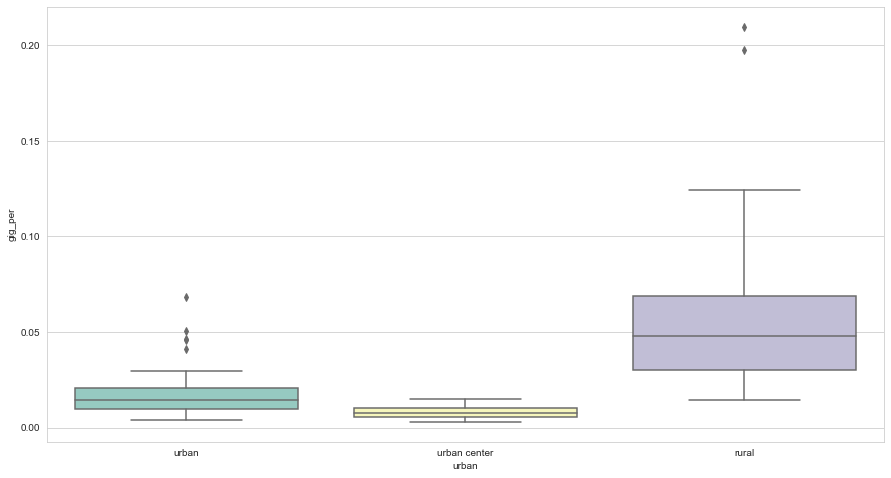

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3")

In [10]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']

In [11]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 15)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

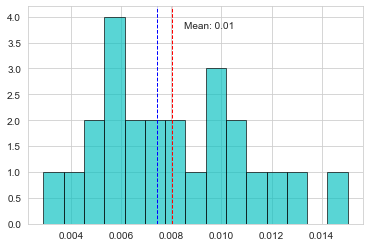

In [12]:
hist_data(urban_center)

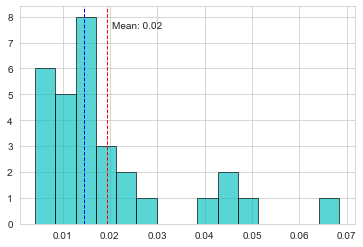

In [13]:
hist_data(urban)

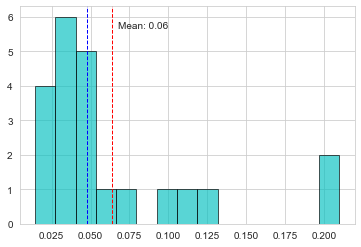

In [14]:
hist_data(rural)

In [15]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 30, label = labels, range = [0,0.25])
    plt.xlabel('percentage of gig workers')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

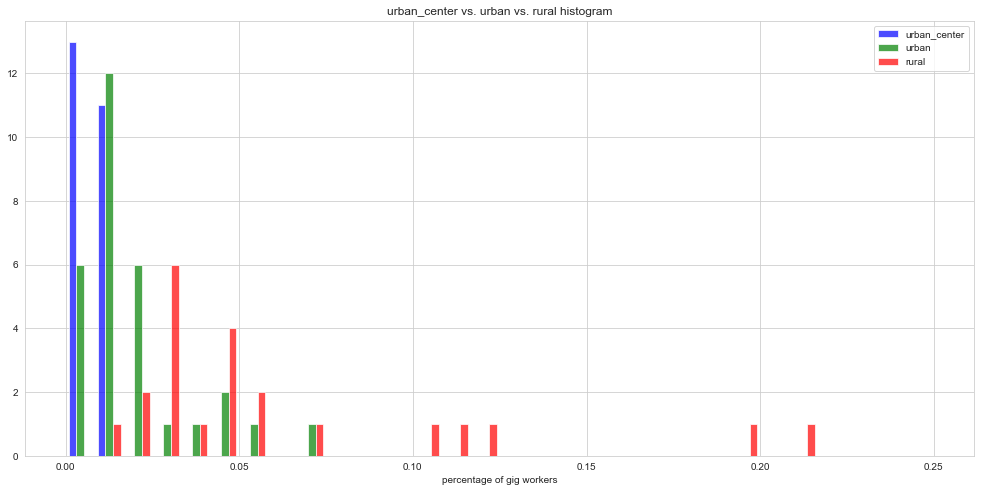

In [16]:
hist_all(['urban_center','urban','rural'],urban_center,urban,rural)

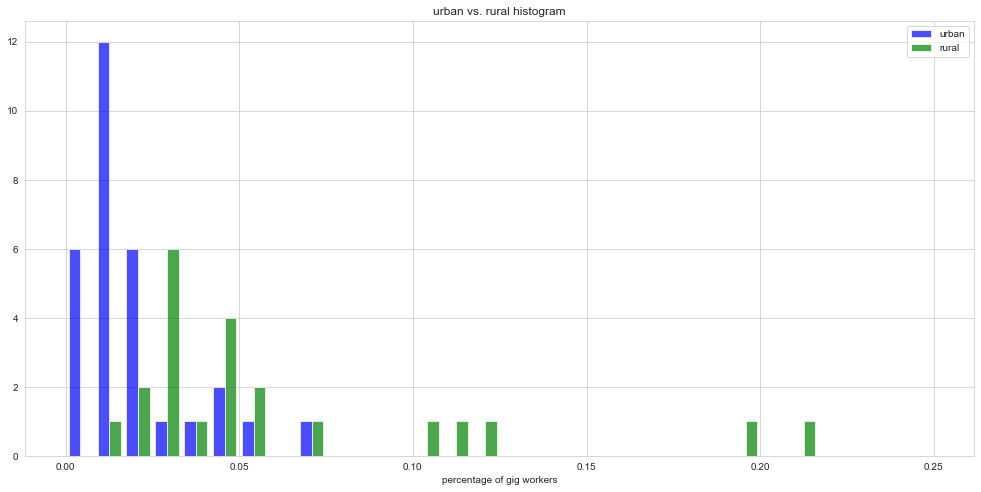

In [17]:
hist_all(['urban','rural'],urban,rural)

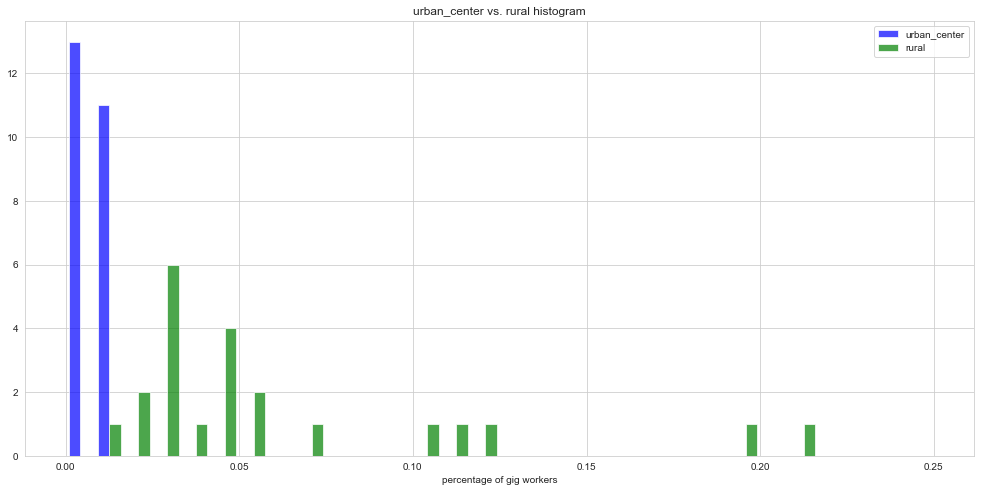

In [18]:
hist_all(['urban_center','rural'],urban_center,rural)

In [19]:
def draw_worker_density(xv,yv):
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title(yv+" vs. "+xv)
    ax.set_xlabel(xv)

pearson r:0.37316733447727873
Spearman rho:0.3146618005658411
kendall tau:0.2586486388321164


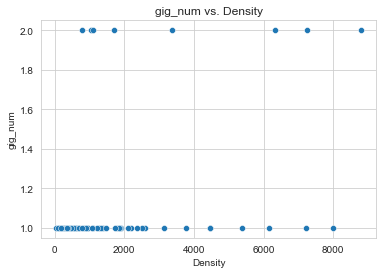

In [20]:
from scipy import stats
draw_worker_density('Density','gig_num')
print('pearson r:' + str(stats.pearsonr(df['Density'], df['gig_num'])[0]))
print('Spearman rho:' + str(stats.spearmanr(df['Density'], df['gig_num'])[0]))
print('kendall tau:' + str(stats.kendalltau(df['Density'], df['gig_num'])[0]))

pearson r:-0.35100600827816075
Spearman rho:-0.7816238089379213
kendall tau:-0.5724815724815724


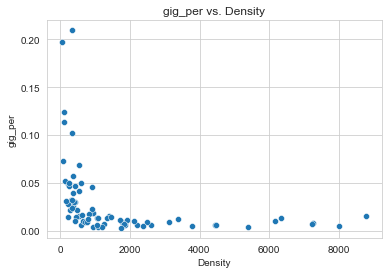

In [21]:
draw_worker_density('Density','gig_per')
print('pearson r:' + str(stats.pearsonr(df['Density'], df['gig_per'])[0]))
print('Spearman rho:' + str(stats.spearmanr(df['Density'], df['gig_per'])[0]))
print('kendall tau:' + str(stats.kendalltau(df['Density'], df['gig_per'])[0]))